In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

# for warning
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('/content/drive/MyDrive/home loan project /apptrain_data')
data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_1,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_2,SK_DPD_DEF_2,NAME_CONTRACT_STATUS_Approved_2,NAME_CONTRACT_STATUS_Completed_2,NAME_CONTRACT_STATUS_Demand_2,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,MONTHS_BALANCE,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,0,1,1,0,8,1.0,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1437.0,0.0,-1072.0,-4185.0,5043.645,0.0,108131.945625,30722.625,3998.570625,0.0,3.0,-1185.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,-47.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,0,1,1,0,3,2.0,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2586.0,0.0,-2434.0,-3292.0,0.000,0.0,254350.125000,0.000,202500.000000,0.0,3.0,-2131.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,0,8,1.0,2,1,9,0,0,0,0,0,0,11,0.505998,0.555912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1326.0,0.0,-595.0,-1065.0,0.000,0.0,94518.900000,0.000,0.000000,0.0,3.0,-682.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,-1.0,1,0,1,0,0,8,2.0,2,6,17,0,0,0,0,0,0,5,0.505998,0.650442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,-1.0,1,0,1,0,0,3,1.0,2,4,11,0,0,0,0,1,1,37,0.505998,0.322738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1149.0,0.0,-783.0,-783.0,0.000,0.0,146250.000000,0.000,0.000000,0.0,3.0,-783.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.shape 

(307511, 199)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 199 entries, SK_ID_CURR to STATUS_X
dtypes: float64(144), int64(55)
memory usage: 466.9 MB


In [11]:
data.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_1,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,...,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_2,SK_DPD_DEF_2,NAME_CONTRACT_STATUS_Approved_2,NAME_CONTRACT_STATUS_Completed_2,NAME_CONTRACT_STATUS_Demand_2,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,MONTHS_BALANCE,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27107.516051,5.222990,4.670288,3.188273,1.472312,1.290390,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,3.441971,0.999997,0.199368,0.998133,0.281066,0.056720,11.032015,2.152658,2.052463,3.090732,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,29.450429,0.504311,5.145034e-01,...,627.304436,2.275128,6.834952,0.031046,121.948951,62.485199,0.333130,0.000016,0.194787,0.000007,0.000046,0.001489,0.030002,-1510.092062,0.135865,-913.622218,-3062.039751,5.618772e+03,0.034682,3.239554e+05,1.173251e+05,3.389878e+03,4.245635e+01,2.679416,-1012.249981,3.056449e+03,0.000065,2.984391,0.018383,0.003486,0.000488,0.000029,-16.942587,0.505120,0.050675,0.019433,0.012673,0.131794,22.853085,9.225813
std,102790.175348,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14494.443757,1.772626,2.544525,1.298753,1.168884,0.951168,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,9.317162,0.001803,0.399526,0.043164,0.449521,0.231307,5.954959,0.910683,0.509034,2.149512,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,20.463558,0.139408,1.908699e-01,...,3599.905819,8.301829,29.617065,0.412074,519.350900,1557.099538,4.831045,0.004032,1.673461,0.002550,0.006747,0.038564,0.661088,1010.149847,15.605771,2264.762502,3972.245873,2.845806e

In [12]:
data.isna().sum().sum()

0

In [13]:
y = data.pop('TARGET')
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [14]:
X = data
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_1,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,...,AMT_PAYMENT_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_2,SK_DPD_DEF_2,NAME_CONTRACT_STATUS_Approved_2,NAME_CONTRACT_STATUS_Completed_2,NAME_CONTRACT_STATUS_Demand_2,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,MONTHS_BALANCE,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,-1.0,1,0,1,1,0,8,1.0,2,6,10,0,0,0,0,0,0,5,0.083037,0.262949,0.139376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1437.0,0.0,-1072.0,-4185.0,5043.645,0.0,108131.945625,30722.625,3998.570625,0.0,3.0,-1185.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,-47.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,-1.0,1,0,1,1,0,3,2.0,1,1,11,0,0,0,0,0,0,39,0.311267,0.622246,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2586.0,0.0,-2434.0,-3292.0,0.000,0.0,254350.125000,0.000,202500.000000,0.0,3.0,-2131.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,0,8,1.0,2,1,9,0,0,0,0,0,0,11,0.505998,0.555912,0.729567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1326.0,0.0,-595.0,-1065.0,0.000,0.0,94518.900000,0.000,0.000000,0.0,3.0,-682.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,-1.0,1,0,1,0,0,8,2.0,2,6,17,0,0,0,0,0,0,5,0.505998,0.650442,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,-1.0,1,0,1,0,0,3,1.0,2,4,11,0,0,0,0,1,1,37,0.505998,0.322738,0.535276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1149.0,0.0,-783.0,-783.0,0.000,0.0,146250.000000,0.000,0.000000,0.0,3.0,-783.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


XGBoost

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [17]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9200941751866594
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70717
           1       0.61      0.01      0.02      6161

    accuracy                           0.92     76878
   macro avg       0.76      0.50      0.49     76878
weighted avg       0.90      0.92      0.88     76878



XGBoost and decision tree with PCA 

In [18]:
pca = PCA()
X = pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197
0,-242332.510982,-165842.274942,17759.207926,1728.909930,67874.166041,-25817.709587,69602.499612,-2246.231835,-87340.355054,177184.169285,-34949.857996,-3137.188277,3776.599244,-5483.598585,-1472.905621,967.096727,-5156.830535,339.858846,-1833.484136,557.304287,717.622341,-620.676166,3986.771230,-1592.438726,-4009.657920,3357.616061,-30.790043,99.879592,91.850200,16.231340,490.588899,-164.580571,-42.780348,751.426897,48.422468,-12.184092,-313.234815,-174.484802,62.295876,0.192698,...,0.018882,0.084622,-0.005208,0.051746,-0.011447,0.013323,-0.006611,-0.004952,-0.004647,-0.003350,0.036843,-0.002121,-0.008291,0.000859,0.015221,-0.002563,0.001226,-0.009447,0.009452,0.006860,-0.000280,-0.000303,0.004353,-0.001945,-0.002860,-4.040485e-04,-0.000133,0.001987,0.000429,0.000118,-0.000308,-0.000003,-0.000096,0.000102,-0.000022,0.000180,6.730935e-05,0.000024,0.000135,0.000004
1,-51046.564427,730189.944769,44524.295777,-12758.633393,25309.532201,-90266.436534,167178.706683,-160698.945544,-86948.546612,177521.763570,-29970.633731,-4491.419622,1280.107467,-7484.122212,-4498.541092,197420.843703,-5835.235997,-123.386217,8448.166007,-357.030677,-1352.778092,4487.124160,-31704.047900,1308.992830,-3490.278673,-2240.137108,39.794528,-46.945383,1562.266571,-163.538251,2580.072351,-92.419509,1137.860186,-543.151243,-257.545128,37.214467,410.018364,199.567723,-124.463745,2.842584,...,-0.005644,-0.000714,-0.020003,0.004223,-0.003733,0.039829,-0.022251,-0.012005,0.006643,0.011440,0.020500,0.004795,0.006970,-0.003059,0.014345,0.000208,-0.003065,0.001497,-0.001121,0.006640,-0.002307,-0.008271,0.031164,0.000494,0.001529,-1.583563e-03,-0.001819,0.037161,-0.000277,-0.000113,-0.000068,0.000017,0.000003,0.000022,0.000188,-0.000226,-7.285084e-06,-0.000017,0.000039,0.000020
2,-289717.140105,-459185.558957,58012.210787,-6731.821643,-36332.977406,22609.307037,12572.901902,101875.783800,-86725.234016,177107.768039,-36022.639764,-2593.889867,3079.732722,-1688.688817,-348.918532,-2211.167779,1655.255521,-323.372935,7616.844647,114.085561,525.475256,-32.156591,-585.744975,26.550827,3059.264588,-4178.707615,-272.515212,46.124554,-41.012191,-46.514162,451.194274,-211.386571,-100.375636,659.080818,-161.292816,4.863313,-132.180571,134.818772,110.270292,-1.495538,...,-0.002301,-0.006962,-0.001414,-0.120729,-0.004042,0.003709,-0.004347,-0.000782,0.000060,0.000018,0.001337,0.004168,0.000144,0.000693,0.000455,0.000113,0.002570,0.000449,0.000070,0.000136,-0.000406,0.000032,-0.000585,0.000612,-0.003969,2.713411e-07,-0.002215,0.010350,-0.000594,-0.000037,0.000032,-0.000276,-0.000029,0.000078,-0.000348,0.000033,3.817668e-05,-0.000071,-0.000057,-0.000003
3,-360938.293861,-252221.525872,15561.514329,-897.444056,21951.532112,-74165.647869,97832.444774,-90989.691536,-102534.421385,177373.919786,-38915.667127,-2777.164678,7762.623835,20917.976249,2794.449917,-3186.809565,1926.325855,-150.111455,-8867.385901,-1623.225774,-2258.441321,-518.066273,3607.383418,-1073.229448,7486.352739,-291.734476,-192.417706,-612.108877,-390.864147,-78.459468,561.739072,-430.924415,-989.511334,798.905475,571.428814,-69.270718,-52.519617,-189.639830,202.836523,2.898367,...,0.007215,-0.019612,0.006044,-0.013433,0.000928,0.005482,-0.004396,-0.000323,0.003717,0.000258,0.001404,-0.000295,0.000356,0.000827,-0.000728,0.001024,0.002811,0.000899,0.001227,0.000940,0.001387,0.000601,-0.000826,0.000132,0.000478,-3.118697e-05,-0.000155,0.013050,-0.000053,0.000147,0.000344,-0.000491,-0.000051,-0.000077,0.000111,-0.000029,1.005938e-05,-0.000161,-0.000003,-0.000016
4,-212804.494398,-74135.279719,53403.349579,-8539.983468,-29107.399919,15377.639059,69936.289162,12755.234659,-88778.168120,177167.534136,-35049.805413,-3256.594541,1114.520414,-4015.5787

In [19]:
pca.explained_variance_

array([7.76614931e+11, 1.62561014e+11, 1.12133065e+11, 8.02906201e+10,
       5.40031664e+10, 3.08775180e+10, 2.47999017e+10, 1.97079280e+10,
       1.94191960e+10, 1.05657946e+10, 9.12556737e+09, 5.69476403e+09,
       1.79137939e+09, 8.67607934e+08, 4.20050396e+08, 3.70791949e+08,
       1.47234523e+08, 1.06129319e+08, 8.38517263e+07, 3.21400470e+07,
       2.53081458e+07, 2.39927081e+07, 2.39472182e+07, 1.81840107e+07,
       1.39064031e+07, 8.38880937e+06, 6.04369549e+06, 4.38797722e+06,
       4.16502108e+06, 2.42988441e+06, 2.01154383e+06, 9.75554959e+05,
       8.93684439e+05, 7.12501400e+05, 3.18799943e+05, 2.37801363e+05,
       2.05077640e+05, 1.75717419e+05, 1.38604222e+05, 2.00884205e+04,
       1.00911195e+04, 3.94848536e+03, 1.58847508e+03, 1.17211212e+03,
       9.61693425e+02, 5.79828847e+02, 5.09336326e+02, 2.94313711e+02,
       2.62025741e+02, 2.51631820e+02, 2.39465734e+02, 2.11379035e+02,
       8.55504449e+01, 2.91148987e+01, 2.49938607e+01, 2.47222975e+01,
      

In [20]:
pca.explained_variance_ratio_

array([5.92949384e-01, 1.24116148e-01, 8.56141562e-02, 6.13022900e-02,
       4.12316876e-02, 2.35751394e-02, 1.89348490e-02, 1.50471016e-02,
       1.48266533e-02, 8.06703704e-03, 6.96741632e-03, 4.34798081e-03,
       1.36772712e-03, 6.62422997e-04, 3.20710578e-04, 2.83101508e-04,
       1.12414294e-04, 8.10302658e-05, 6.40212124e-05, 2.45390866e-05,
       1.93228959e-05, 1.83185526e-05, 1.82838208e-05, 1.38835831e-05,
       1.06176083e-05, 6.40489791e-06, 4.61439173e-06, 3.35024255e-06,
       3.18001442e-06, 1.85522890e-06, 1.53582378e-06, 7.44841090e-07,
       6.82332539e-07, 5.43998382e-07, 2.43405351e-07, 1.81562530e-07,
       1.56577804e-07, 1.34161128e-07, 1.05825017e-07, 1.53376096e-08,
       7.70462018e-09, 3.01468832e-09, 1.21280866e-09, 8.94913467e-10,
       7.34257740e-10, 4.42702225e-10, 3.88880832e-10, 2.24709990e-10,
       2.00057964e-10, 1.92122153e-10, 1.82833285e-10, 1.61388951e-10,
       6.53181925e-11, 2.22293708e-11, 1.90829377e-11, 1.88755978e-11,
      

In [21]:
pca.n_components_

198

In [22]:
pca.n_features_

198

In [23]:
pca.components_

array([[ 8.42533845e-05,  4.27019203e-09,  4.08928201e-08, ...,
         9.71588328e-09,  7.96033688e-07,  7.17329132e-07],
       [-1.04136809e-04, -1.62057123e-07,  1.89184603e-08, ...,
         1.94337283e-08,  5.09483082e-06,  2.37912806e-06],
       [ 9.15810166e-04,  1.26468976e-08, -2.11863915e-10, ...,
         9.24317994e-08,  5.13084964e-06,  9.53497206e-07],
       ...,
       [ 3.27831316e-11, -1.35020754e-05, -7.17187448e-06, ...,
         1.34796225e-07, -4.99616647e-08,  1.11956299e-07],
       [-6.37197468e-11,  2.89182137e-04, -1.57694886e-05, ...,
        -5.20559152e-07, -6.51060406e-08, -2.58385186e-08],
       [ 4.97488919e-11, -7.88757309e-06, -3.28578773e-06, ...,
        -3.15015029e-08,  3.89292182e-09,  2.03272286e-11]])

In [24]:
X=X.iloc[:,:3]
X.head()

,0,1,2
0,-242332.510982,-165842.274942,17759.207926
1,-51046.564427,730189.944769,44524.295777
2,-289717.140105,-459185.558957,58012.210787
3,-360938.293861,-252221.525872,15561.514329
4,-212804.494398,-74135.279719,53403.349579


In [25]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled_X=scaler.transform(X)
scaled_X

array([[-0.27498533, -0.41132751,  0.05303437],
       [-0.05792478,  1.8110413 ,  0.13296303],
       [-0.32875474, -1.13888724,  0.17324203],
       ...,
       [ 0.8395832 ,  0.02308331, -0.27775166],
       [-0.35912124, -0.5220629 ,  0.0850309 ],
       [ 0.04289163,  0.25265794, -0.04562026]])

In [27]:
pca = PCA(n_components=3)
pca

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.fit(scaled_X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
x = pca.transform(scaled_X)
x

array([[ 0.12602168, -0.39512213, -0.27498533],
       [-0.19434886,  1.80548561, -0.05792478],
       [ 0.37490096, -1.08927784, -0.32875474],
       ...,
       [-0.27738281, -0.02715885,  0.8395832 ],
       [ 0.17737955, -0.49831357, -0.35912124],
       [-0.09024077,  0.24036191,  0.04289163]])

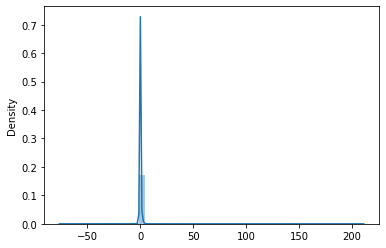

In [30]:
import seaborn as sb 
sb.distplot(x)
plt.show()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [32]:
model = DecisionTreeClassifier(max_depth=6)  # max. depth
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9192616873487864

In [33]:
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70679
           1       0.00      0.00      0.00      6199

    accuracy                           0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878

[[70671     8]
 [ 6199     0]]


In [34]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9193657483285205

In [35]:
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70679
           1       0.00      0.00      0.00      6199

    accuracy                           0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878

[[70679     0]
 [ 6199     0]]


In [36]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Highly imbalanced dataset, hence we are trying SMOTE here 

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 212007, 1: 18626})
SMOTE Classes Counter({0: 212007, 1: 212007})


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga',max_iter=10000,random_state=30)
model.fit(X_train_smote,y_train_smote)
y_pre = model.predict(X_test)
accuracy_score(y_test,y_pre)
print(classification_report(y_test,y_pre))
confusion_matrix(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.94      0.35      0.51     70679
           1       0.09      0.73      0.16      6199

    accuracy                           0.38     76878
   macro avg       0.51      0.54      0.34     76878
weighted avg       0.87      0.38      0.49     76878



array([[25030, 45649],
       [ 1669,  4530]])

In [41]:
accuracy_score(y_test,y_pre)

0.3845053201175889